In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


In [2]:
X = []
for i in range(10000):
 x = []
 # Size of the input
 n = np.random.randint(2, 9)

 random = np.random.uniform(low=0.0, high=1.0, size=n)


 # Create an array of zeros with size 10
 arr = np.zeros(n, dtype=int)

 # Generate two random indices for the two ones
 idx1, idx2 = np.random.choice(n, size=2, replace=False)

 # Set the values at the two random indices to 1
 arr[idx1] = 1
 arr[idx2] = 1
 x.append(random)
 x.append(arr)
 y = np.array(x)

 z = np.transpose(y)
 X.append(z)



In [3]:
Y = []
for i in range(len(X)):
  label=0
  for j in range(len(X[i])):
   label += X[i][j][0]*X[i][j][1]
  Y.append(label)

In [7]:
X[10]

array([[0.34678473, 0.        ],
       [0.37043311, 0.        ],
       [0.01478029, 1.        ],
       [0.67039655, 0.        ],
       [0.29229396, 1.        ]])

Elmon

In [ ]:
class ElmanNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights
        self.w_ih = torch.tensor(np.random.randn(hidden_size, input_size),requires_grad = True)
        self.w_hh = torch.tensor(np.random.randn(hidden_size, hidden_size), requires_grad = True)
        self.w_ho = torch.tensor(np.random.randn(output_size, hidden_size), requires_grad = True)
        
        # Initialize biases
        self.b_h = torch.tensor(np.zeros((hidden_size, 1)), requires_grad = True)
        self.b_o = torch.tensor(np.zeros((output_size, 1)), requires_grad = True)
        
    def forward(self, x):
        h = torch.tensor(np.zeros((self.hidden_size, 1)))
        
        for i in range(x.shape[0]):
           
            h1 = torch.matmul(self.w_ih , torch.tensor(x[i])).unsqueeze(1)
           
            h2 = torch.matmul(self.w_hh , h)
           
            h3 = self.b_h
           
            h = torch.tanh( h1+ h2 + h3)
            
            
            # Output layer
            y = torch.relu(torch.matmul(self.w_ho , h) + self.b_o)
        
        return y
    
    def train(self, x, y_true, learning_rate, num_epochs):
        optimizer = optim.SGD([self.w_ih,self.w_hh,self.w_ho,self.b_h,self.b_o], lr=learning_rate)
        epoch_loss_graph = []
        base_line = []
        for epoch in range(num_epochs):
            loss = 0
            epoch_loss = 0
            l = 0
            for i in range(x.shape[0]):
                # Forward pass
                y_pred = self.forward(x[i])
                
                # Compute loss
                epoch_loss += torch.square(y_pred - y_true[i]).sum()
                loss = torch.square(y_pred - y_true[i]).sum()
                l += torch.square(torch.tensor(1) - y_true[i]).sum()
                # Backward pass
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
            
            a = float(epoch_loss/x.shape[0])
            print(a)
            epoch_loss_graph.append(a) 
            b = float(l)/x.shape[0]
            base_line.append(b)
       
        return epoch_loss_graph,base_line
               
            # Compute average loss for the epoch
        

In [ ]:
# Create Elman network object
elman_net = ElmanNetwork(input_size=2, hidden_size=3, output_size=1)


# Split dataset
train_ratio = 0.6
train_size = int(train_ratio * len(X))
X_train, X_test = np.split(X, [train_size])
y_train, y_test = np.split(Y, [train_size])

points , base = elman_net.train(X_train, y_train, learning_rate=0.01, num_epochs=40)




LSTM

In [ ]:
class LSTMNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        
        self.hidden_size = hidden_size
        self.input_size = input_size
        self.output_size = output_size
        # self.cell_state = cell_state

        #Initilaize the weights
        self.w_f = torch.tensor(np.random.randn(hidden_size, hidden_size+input_size),requires_grad = True)
        self.w_i = torch.tensor(np.random.randn(hidden_size, hidden_size+input_size),requires_grad = True)
        self.w_o = torch.tensor(np.random.randn(hidden_size, hidden_size+input_size),requires_grad = True)
        self.w_c = torch.tensor(np.random.randn(hidden_size, hidden_size+input_size),requires_grad = True)
        self.w_y = torch.tensor(np.random.randn(1,hidden_size),requires_grad = True)

        #Initialize biases
        self.bf = torch.tensor(np.random.randn(hidden_size, 1),requires_grad = True)
        self.bi = torch.tensor(np.random.randn(hidden_size, 1),requires_grad = True)
        self.bo = torch.tensor(np.random.randn(hidden_size, 1),requires_grad = True)
        self.bc = torch.tensor(np.random.randn(hidden_size, 1),requires_grad = True)
        self.by = torch.tensor(np.random.randn(1,1),requires_grad = True)

    def forward(self, x):
        h = torch.tensor(np.zeros((self.hidden_size, 1)))
        C = torch.tensor(np.zeros((self.hidden_size,1)))
        # print(h.size())
        for j in range(x.shape[0]):
            f  = torch.sigmoid(torch.matmul(self.w_f, torch.cat((h, torch.tensor(x[j]).unsqueeze(1)),dim=0)) + self.bf)
            i  =   torch.sigmoid(torch.matmul(self.w_i, torch.cat((h, torch.tensor(x[j]).unsqueeze(1)),dim=0)) + self.bi)
            cell= torch.sigmoid(torch.matmul(self.w_c, torch.cat((h, torch.tensor(x[j]).unsqueeze(1)),dim=0)) + self.bc)
            C = f*C + i*cell
            o  = torch.sigmoid(torch.matmul(self.w_o, torch.cat((h, torch.tensor(x[j]).unsqueeze(1)),dim=0)) + self.bo)
            h = o*torch.tanh(C)
            
            
            
            
            
            # Output layer
            y = torch.relu(torch.matmul(self.w_y , h) + self.by)
        
        return y
    def train(self, x, y_true, learning_rate, num_epochs):
        optimizer1 = optim.SGD([self.w_f,self.w_i,self.w_c,self.w_o,self.w_y,self.bf,self.bi,self.bc,self.bo,self.by], lr=learning_rate)
        epoch_loss_graph1 = []
        # base_line = []
        for epoch in range(num_epochs):
            loss1 = 0
            epoch_loss1 = 0
            # l = 0
            for i in range(x.shape[0]):
                # Forward pass
                
                y_pred = self.forward(x[i])
                
                # Compute loss
                epoch_loss1 += torch.square(y_pred - y_true[i]).sum()
                loss1 = torch.square(y_pred - y_true[i]).sum()
                # l += torch.square(torch.tensor(1) - y_true[i]).sum()
                # Backward pass
                optimizer1.zero_grad()
                loss1.backward()
                optimizer1.step()
            # print(float(epoch_loss/x.shape[0]))
            # print(float(epoch_loss1/x.shape[0]))
            # print(float(epoch_loss1/x.shape[0]))
            a1 = float(epoch_loss1/x.shape[0])
            epoch_loss_graph1.append(a1) 
            # base_line.append(float(l)/x.shape[0])
        # print(epoch_loss_graph) 
        return epoch_loss_graph1





In [ ]:
# Create LSTM network object
lstm_net = LSTMNetwork(2,3,1)

points1 = lstm_net.train(X_train, y_train, 0.01, 40)

GRU

In [ ]:
class GRUNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        
        self.hidden_size = hidden_size
        self.input_size = input_size
        self.output_size = output_size
        # self.cell_state = cell_state

        #Initilaize the weights
        self.w_z = torch.tensor(np.random.randn(hidden_size, hidden_size+input_size),requires_grad = True)
        self.w_r = torch.tensor(np.random.randn(hidden_size, hidden_size+input_size),requires_grad = True)
        self.w = torch.tensor(np.random.randn(hidden_size, hidden_size+input_size),requires_grad = True)
        self.w_y = torch.tensor(np.random.randn(1,hidden_size),requires_grad = True)

        #Initialize bias
        self.by = torch.tensor(np.random.randn(1,1),requires_grad = True)

    def forward(self, x):
        h = torch.tensor(np.zeros((self.hidden_size, 1)))
       
        # print(h.size())
        for k in range(x.shape[0]):
            z  = torch.sigmoid(torch.matmul(self.w_z, torch.cat((h, torch.tensor(x[k]).unsqueeze(1)),dim=0)))
            r  =   torch.sigmoid(torch.matmul(self.w_r, torch.cat((h, torch.tensor(x[k]).unsqueeze(1)),dim=0)))
            hy = torch.tanh(torch.matmul(self.w, torch.cat((r*h, torch.tensor(x[k]).unsqueeze(1)),dim=0)))         
            h = (torch.ones(self.hidden_size,1)-z)*h + z*hy
            
            
            
            
            
            # Output layer
            y = torch.relu(torch.matmul(self.w_y , h) + self.by)
        
        return y
    def train(self, x, y_true, learning_rate, num_epochs):
        optimizer = optim.SGD([self.w_z,self.w_r,self.w,self.w_y,self.by], lr=learning_rate)
        epoch_loss_graph2 = []
        # base_line = []
        for epoch in range(num_epochs):
            loss2 = 0
            epoch_loss2 = 0
            # l = 0
            for i in range(x.shape[0]):
                # Forward pass
                
                y_pred = self.forward(x[i])
                
                # Compute loss
                epoch_loss2 += torch.square(y_pred - y_true[i]).sum()
                loss2 = torch.square(y_pred - y_true[i]).sum()
                
                # Backward pass
                optimizer.zero_grad()
                loss2.backward()
                optimizer.step()
            
            a2 = float(epoch_loss2/x.shape[0])
            epoch_loss_graph2.append(a2) 
            # base_line.append(float(l)/x.shape[0])
        # print(epoch_loss_graph) 
        return epoch_loss_graph2





In [ ]:
# Create LSTM network object
gru_net = GRUNetwork(2,3,1)

points2 = gru_net.train(X_train, y_train, 0.01, 40)

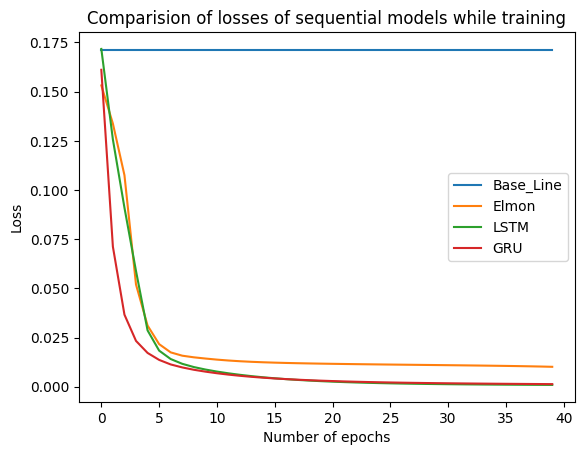

In [ ]:
plt.plot(np.array(base),label='Base_Line')
plt.plot(np.array(points),label='Elmon')
plt.plot(np.array(points1),label='LSTM')
plt.plot(np.array(points2),label='GRU')
plt.title('Comparision of losses of sequential models while training')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.plot()
plt.legend()
plt.show()

tensor(28.9367, dtype=torch.float64)
tensor(3.3501, dtype=torch.float64)
tensor(7.1579, dtype=torch.float64)


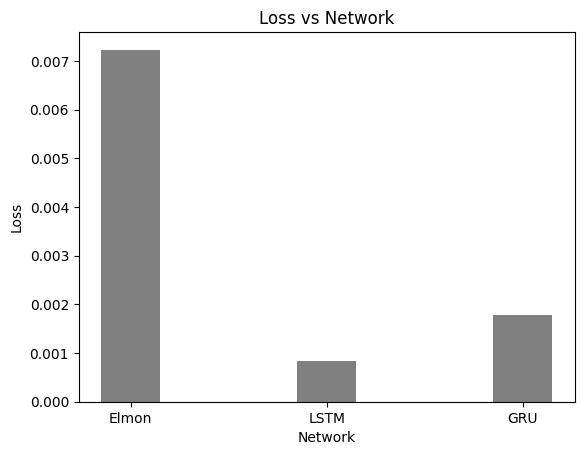

In [ ]:

labels1 = []
loss1 = 0
# Test the network
for i in range(X_test.shape[0]):
 y_predict1 = elman_net.forward(X_test[i]).detach().numpy()
 labels1.append(y_predict1)
 loss1 += torch.square(torch.tensor(y_predict1) - y_test[i]).sum()
print(loss1)
l1 = loss1/X_test.shape[0]

labels2 = []
loss2 = 0
# Test the network
for j in range(X_test.shape[0]):
 y_predict2 = lstm_net.forward(X_test[j]).detach().numpy()
 labels2.append(y_predict2)
 loss2 += torch.square(torch.tensor(y_predict2)- y_test[j]).sum()
print(loss2)
l2 = loss2/X_test.shape[0]

labels3 = []
loss3 = 0
# Test the network
for k in range(X_test.shape[0]):
 y_predict3 = gru_net.forward(X_test[k]).detach().numpy()
 labels3.append(y_predict3)
 loss3 += torch.square(torch.tensor(y_predict3) - y_test[k]).sum()

print(loss3)
l3 = loss3/X_test.shape[0]
arr = [l1,l2,l3]
y_axis = ['Elmon','LSTM','GRU']
plt.bar(y_axis,arr, color ='grey',
        width = 0.3)
 
plt.xlabel("Network")
plt.ylabel("Loss")
plt.title("Loss vs Network")
plt.show()